# TCS Stock Data Analysis & Prediction
This notebook analyzes historical stock data of Tata Consultancy Services (TCS) and builds a machine learning model to predict closing stock prices using features like open, high, low, volume, and temporal data.

## Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import datetime
import pickle

## Load and Inspect Dataset

In [2]:
# Load historical stock data
data = pd.read_csv('TCS_stock_history.csv')
data['Date'] = pd.to_datetime(data['Date'])
data.sort_values(by='Date', inplace=True)
data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-08-12,28.794172,29.742206,28.794172,29.519140,212976,0.0,0.0
1,2002-08-13,29.556316,30.030333,28.905705,29.119476,153576,0.0,0.0
2,2002-08-14,29.184536,29.184536,26.563503,27.111877,822776,0.0,0.0
3,2002-08-15,27.111877,27.111877,27.111877,27.111877,0,0.0,0.0
4,2002-08-16,26.972458,28.255089,26.582090,27.046812,811856,0.0,0.0


## Data Preprocessing

In [3]:
# Check and convert numeric columns
data['Open'] = pd.to_numeric(data['Open'], errors='coerce')
data['High'] = pd.to_numeric(data['High'], errors='coerce')
data['Low'] = pd.to_numeric(data['Low'], errors='coerce')
data['Close'] = pd.to_numeric(data['Close'], errors='coerce')

# Fill missing values
data.fillna(method='ffill', inplace=True)
data.isnull().sum()

C:\Users\CHIRAG SHARMA\AppData\Local\Temp\ipykernel_20208\2556341117.py:8: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

## Exploratory Data Analysis (Close Price Trend)

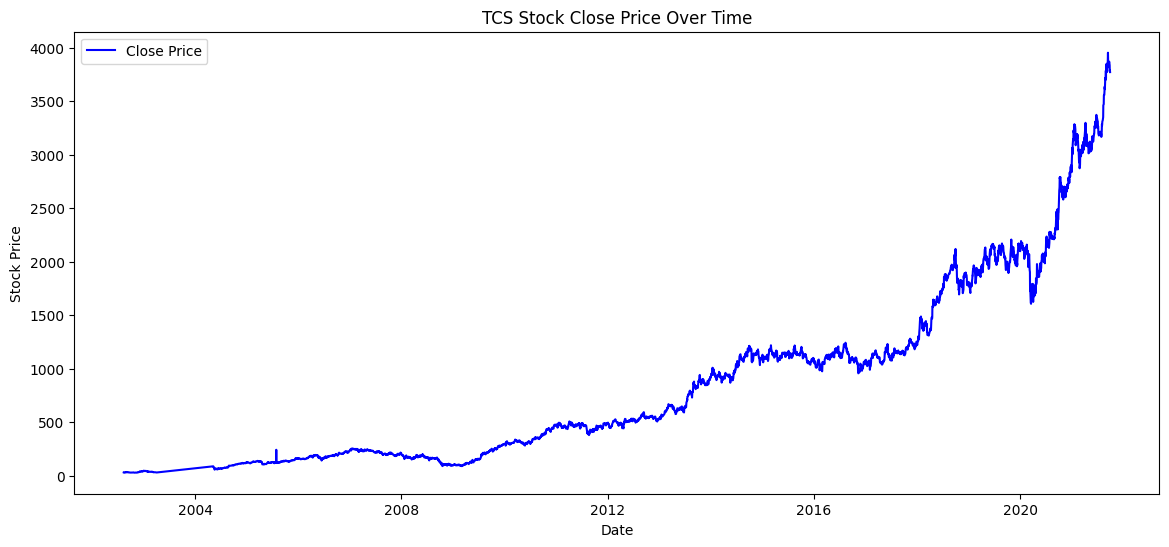

In [4]:
plt.figure(figsize=(14, 6))
plt.plot(data['Date'], data['Close'], label='Close Price', color='blue')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('TCS Stock Close Price Over Time')
plt.legend()
plt.show()

## Moving Averages

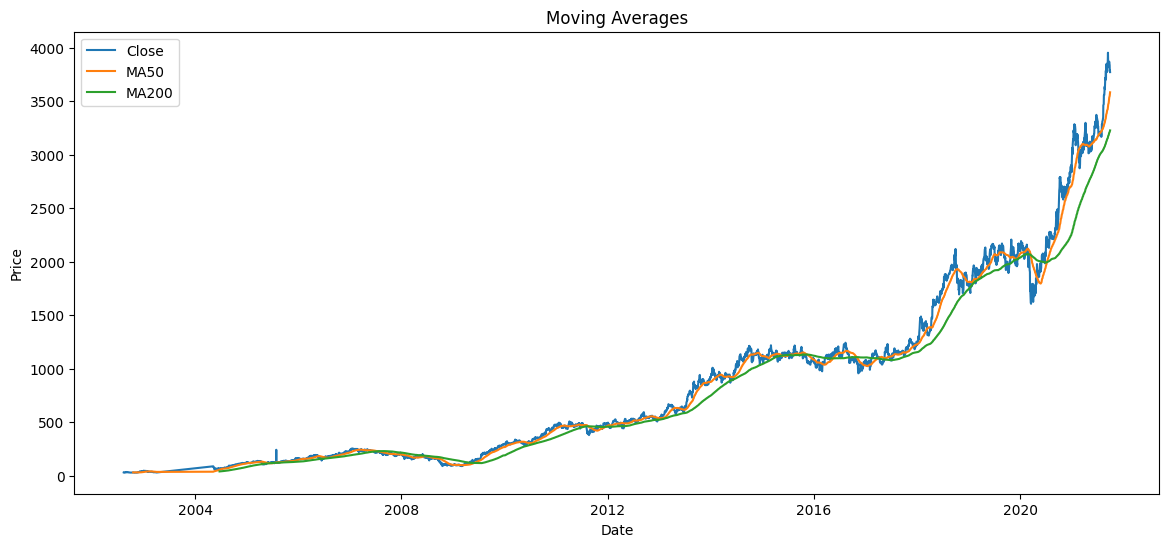

In [5]:
data['MA50'] = data['Close'].rolling(window=50).mean()
data['MA200'] = data['Close'].rolling(window=200).mean()

plt.figure(figsize=(14, 6))
plt.plot(data['Date'], data['Close'], label='Close')
plt.plot(data['Date'], data['MA50'], label='MA50')
plt.plot(data['Date'], data['MA200'], label='MA200')
plt.title('Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

## Feature Engineering

In [6]:
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day
data['Day_of_Week'] = data['Date'].dt.dayofweek
data['Prev_Close'] = data['Close'].shift(1)
data.dropna(inplace=True)
data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,MA50,MA200,Year,Month,Day,Day_of_Week,Prev_Close
199,2004-06-21,66.919920,68.407029,64.540547,65.451401,49328,0.0,0.0,53.539858,38.361673,2004,6,21,0,66.157806
200,2004-06-22,65.432855,65.618744,63.573967,63.927155,20064,0.0,0.0,54.208315,38.533714,2004,6,22,1,65.451401
201,2004-06-23,64.596334,65.061056,61.584935,62.681683,22912,0.0,0.0,54.837176,38.701525,2004,6,23,2,63.927155
202,2004-06-24,63.192893,64.317518,61.919554,63.722672,21592,0.0,0.0,55.496152,38.884579,2004,6,24,3,62.681683
203,2004-06-25,63.202185,65.061073,63.202185,63.722672,60280,0.0,0.0,56.147134,39.067632,2004,6,25,4,63.722672


## Model Training and Prediction

In [7]:
X = data[['Open', 'High', 'Low', 'Volume', 'Prev_Close', 'Day_of_Week', 'Month']]
y = data['Close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R-Squared Score:", r2_score(y_test, y_pred))

Mean Squared Error: 39.049929985302335
R-Squared Score: 0.9999438356582192


C:\Users\CHIRAG SHARMA\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\CHIRAG SHARMA\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


## Actual vs Predicted Prices

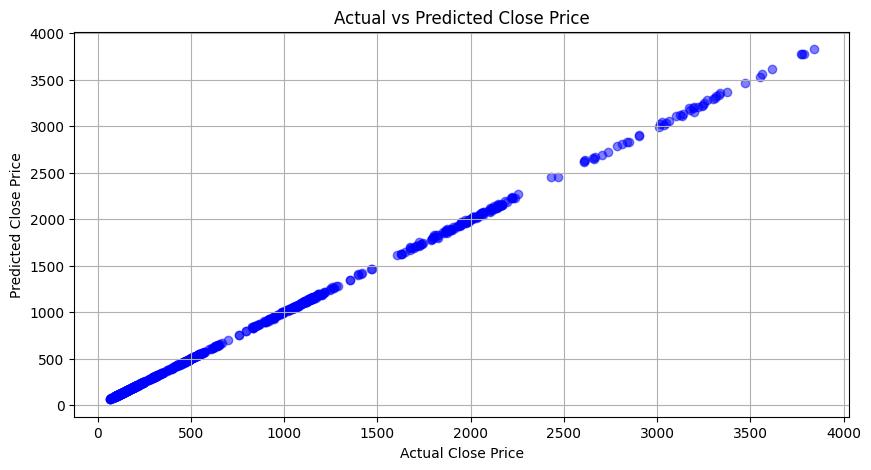

In [8]:
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.xlabel('Actual Close Price')
plt.ylabel('Predicted Close Price')
plt.title('Actual vs Predicted Close Price')
plt.grid()
plt.show()

## Save the Trained Model

In [9]:
with open('TCS_Stock_Predictor.pkl', 'wb') as file:
    pickle.dump(model, file)